In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys
import warnings
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
%matplotlib inline

In [54]:
df=pd.read_csv("/content/drive/MyDrive/csv/naruto.csv",encoding='cp1252')

In [55]:
df

,Unnamed: 0,Num_episode,Title,Type,Year_launch,Rate,Votes,Saga,Airdate
0,1,1,Homecoming,Mixed Canon/Filler,2007,8.2,728,s1 Kazekage Rescue,2007-02-15
1,2,2,The Akatsuki Makes Its Move,Mixed Canon/Filler,2007,8.0,575,s1 Kazekage Rescue,2007-02-15
2,3,3,The Results of Training,Mixed Canon/Filler,2007,8.0,508,s1 Kazekage Rescue,2007-02-22
3,4,4,The Jinchuriki of the Sand,Mixed Canon/Filler,2007,8.2,517,s1 Kazekage Rescue,2007-03-01
4,5,5,The Kazekage Stands Tall,Mixed Canon/Filler,2007,8.2,486,s1 Kazekage Rescue,2007-03-15
...,...,...,...,...,...,...,...,...,...
495,496,496,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,7.5,313,s21 Series,2017-02-23
496,497,497,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,7.2,301,s21 Series,2017-03-02
497,498,498,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,6.8,305,s21 Series,2017-03-09
498,499,499,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,7.6,323,s21 Series,2017-03-16


In [56]:
df.isnull().sum()

Unnamed: 0     0
Num_episode    0
Title          0
Type           0
Year_launch    0
Rate           0
Votes          0
Saga           0
Airdate        0
dtype: int64

In [57]:
# Get unique count for each variable
df.nunique()

Unnamed: 0     500
Num_episode    500
Title          499
Type             3
Year_launch     11
Rate            45
Votes          288
Saga            21
Airdate        461
dtype: int64

In [58]:
df['Type'].value_counts().sort_values()

Mixed Canon/Filler     63
Filler                203
Manga Canon           234
Name: Type, dtype: int64

In [59]:
df['Year_launch'].value_counts().sort_values()

2017    13
2007    41
2016    44
2008    49
2013    49
2011    50
2014    50
2015    50
2009    51
2010    51
2012    52
Name: Year_launch, dtype: int64

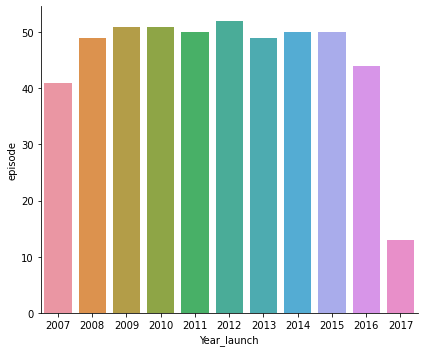

In [60]:
sns.catplot(
    x='Year_launch', 
    data=df,
    height=5,
    aspect=1.2,
    kind='count'
).set_axis_labels('Year_launch', 'episode')

plt.show()

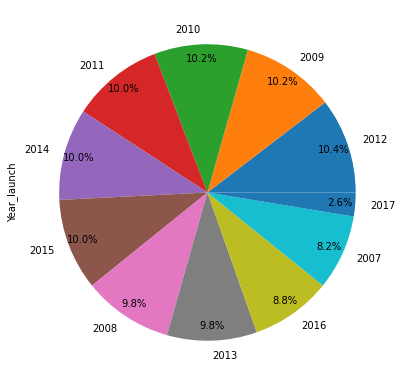

In [61]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(211)
df['Year_launch'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)

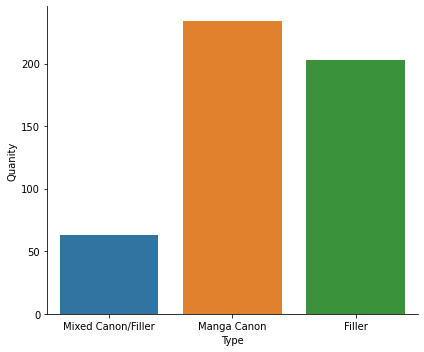

In [62]:
sns.catplot(
    x='Type', 
    data=df,
    height=5,
    aspect=1.2,
    kind='count'
).set_axis_labels('Type','Quanity')

plt.show()

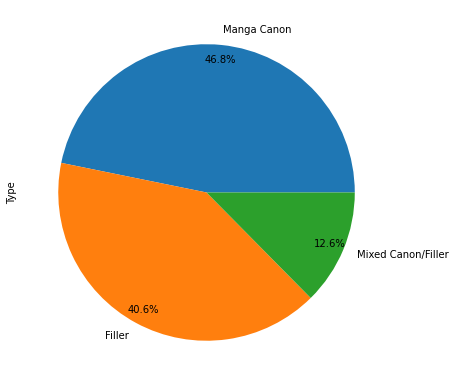

In [63]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(211)
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%',pctdistance=0.9)

Text(0.5, 1.0, 'Rate over time')

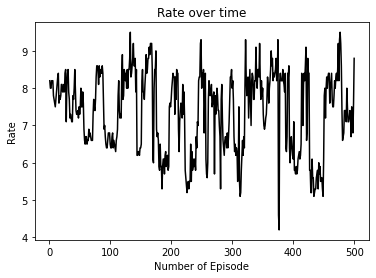

In [64]:
# Rate over time, you can see this as a time series 
sns.lineplot(data=df,x="Num_episode",y="Rate",color="black")
plt.xlabel("Number of Episode")
plt.title("Rate over time")

Text(0.5, 1.0, 'Vote')

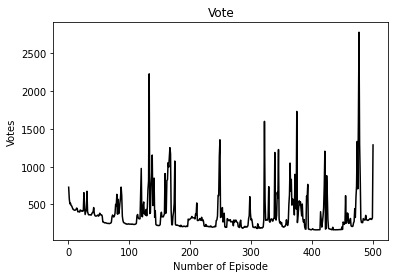

In [70]:
sns.lineplot(data=df,x="Num_episode",y="Votes",color="black")
plt.xlabel("Number of Episode")
plt.title("Vote")

In [65]:
#spliting Saga for plotting
df[["Season", "Name of Season"]] = df["Saga"].str.split(' ', 1, expand=True)
seasons = df .\
    groupby("Season", as_index=False)[["Rate", "Votes"]] .\
    mean() .\
    sort_values("Rate", ascending=False)

Text(0.5, 1.0, 'Rate by Seasons')

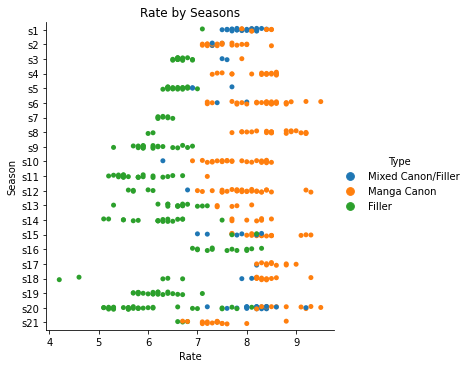

In [66]:
# Rate of all episodes by season and type
sns.catplot(data=df, x="Rate", y="Season", hue="Type")
plt.title("Rate by Seasons")

Text(0.5, 1.0, 'Mean rate by Season')

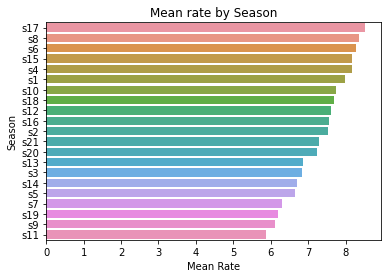

In [67]:
#Average rate by season
sns.barplot(data=seasons, x="Rate", y="Season")
plt.xlabel("Mean Rate")
plt.title("Mean rate by Season")

In [68]:
df['Saga'].value_counts().sort_values()

s7 The Six-Tailed Demon Slug                                                 8
s17 The Fourth Great Ninja War - The Return Of Squad Seven                  11
s16 Kakashi: Shadow Of The Anbu Black Ops                                   13
s4 Immortal Devastators                                                     17
s3 Twelve Guardian Ninja                                                    18
s19 Naruto'S Back ~The Tracks Of His Friends                                20
s13 The Seven Shinobi Swordsmen                                             20
s21 Series                                                                  21
s9 The Locus Of Konoha                                                      21
s2 Long-Awaited Reunion                                                     21
s11 Paradise On The Ship                                                    21
s18 The Fourth Great Ninja War - Obito Uchiha Against The Shinobi Forces    21
s8 Two Saviors                                      

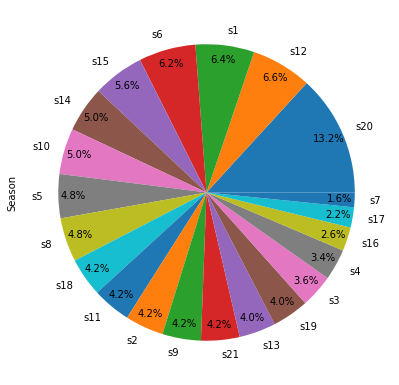

In [69]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(211)
df['Season'].value_counts().plot(kind='pie', autopct='%1.1f%%',pctdistance=0.9)

                            #Thank You#